In [1]:
# Basic imports
import pandas as pd
import numpy as np
import os
import pickle
import warnings
warnings.filterwarnings("ignore")

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

# Modeling
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from keras import layers
from keras import models
from keras import optimizers
from keras.models import model_from_json
from PIL import Image
from skimage import transform
from tensorflow.keras import regularizers

## Data Understanding

The data that I used for this project comes from a dataset from [Kaggle](https://www.kaggle.com/c/state-farm-distracted-driver-detection) titled "State Farm Distracted Driver Detection."

The dataset consists of 22,424 photos belonging to 10 classes. I split each class into train and validation groupings with 80% of the images in the train data and 20% in the validation data. 

Regarding the test data, the data source provided a folder of 79,388 unlabeled images. After going through many of these images, I manually labeled 338 of them, with each class containing 33 test photos, on average. 

A critical component of this project is that no driver appeared in both the train/validation data and the test data. This was done to prevent the model from learning the drivers' faces as opposed to the drivers' actions.

#### The 10 classes are as follows:

**c0 = SAFE DRIVING**  
**c1 = TEXTING WITH RIGHT HAND**  
**c2 = TALKING ON THE PHONE WITH RIGHT HAND**  
**c3 = TEXTING WITH LEFT HAND**  
**c4 = TALKING ON THE PHONE WITH LEFT HAND**  
**c5 = OPERATING THE RADIO**  
**c6 = DRINKING A BEVERAGE**  
**c7 = REACHING BEHIND**  
**c8 = HAIR AND MAKEUP**  
**c9 = TALKING TO PASSENGER**  

In [2]:
c0_img = Image.open('split_data/correct_train/c0/img_208.jpg')
c0_img = c0_img.resize((320, 240))

c1_img = Image.open('split_data/correct_train/c1/img_115.jpg')
c1_img = c1_img.resize((320, 240))

c2_img = Image.open('split_data/correct_train/c2/img_271.jpg')
c2_img = c2_img.resize((320, 240))

c3_img = Image.open('split_data/correct_train/c3/img_477.jpg')
c3_img = c3_img.resize((320, 240))

c4_img = Image.open('split_data/correct_train/c4/img_1762.jpg')
c4_img = c4_img.resize((320, 240))

c5_img = Image.open('split_data/correct_train/c5/img_1605.jpg')
c5_img = c5_img.resize((320, 240))

c6_img = Image.open('split_data/correct_train/c6/img_372.jpg')
c6_img = c6_img.resize((320, 240))

c7_img = Image.open('split_data/correct_train/c7/img_845.jpg')
c7_img = c7_img.resize((320, 240))

c8_img = Image.open('split_data/correct_train/c8/img_2667.jpg')
c8_img = c8_img.resize((320, 240))

c9_img = Image.open('split_data/correct_train/c9/img_2412.jpg')
c9_img = c9_img.resize((320, 240))

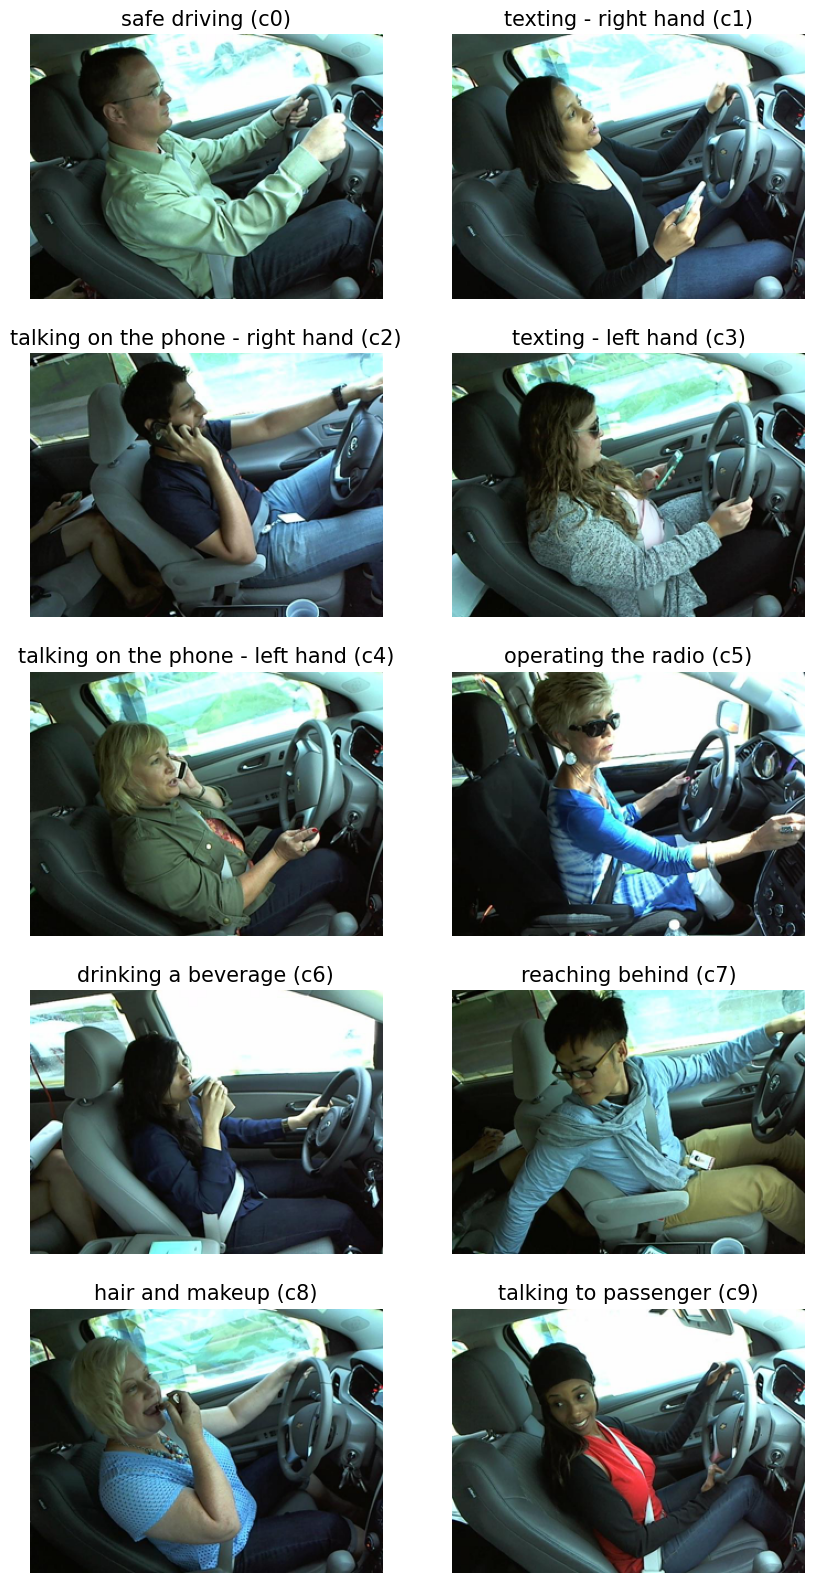

In [3]:
fig = plt.figure(figsize=(10, 20))
rows = 5
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(c0_img)
plt.axis('off')
plt.title("safe driving (c0)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 2)
plt.imshow(c1_img)
plt.axis('off')
plt.title("texting - right hand (c1)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 3)
plt.imshow(c2_img)
plt.axis('off')
plt.title("talking on the phone - right hand (c2)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 4)
plt.imshow(c3_img)
plt.axis('off')
plt.title("texting - left hand (c3)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 5)
plt.imshow(c4_img)
plt.axis('off')
plt.title("talking on the phone - left hand (c4)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 6)
plt.imshow(c5_img)
plt.axis('off')
plt.title("operating the radio (c5)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 7)
plt.imshow(c6_img)
plt.axis('off')
plt.title("drinking a beverage (c6)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 8)
plt.imshow(c7_img)
plt.axis('off')
plt.title("reaching behind (c7)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 9)
plt.imshow(c8_img)
plt.axis('off')
plt.title("hair and makeup (c8)",  fontdict = {'fontsize': 15})

fig.add_subplot(rows, columns, 10)
plt.imshow(c9_img)
plt.axis('off')
plt.title("talking to passenger (c9)",  fontdict = {'fontsize': 15});

## Data Analysis

### Visualizing Class Sizes

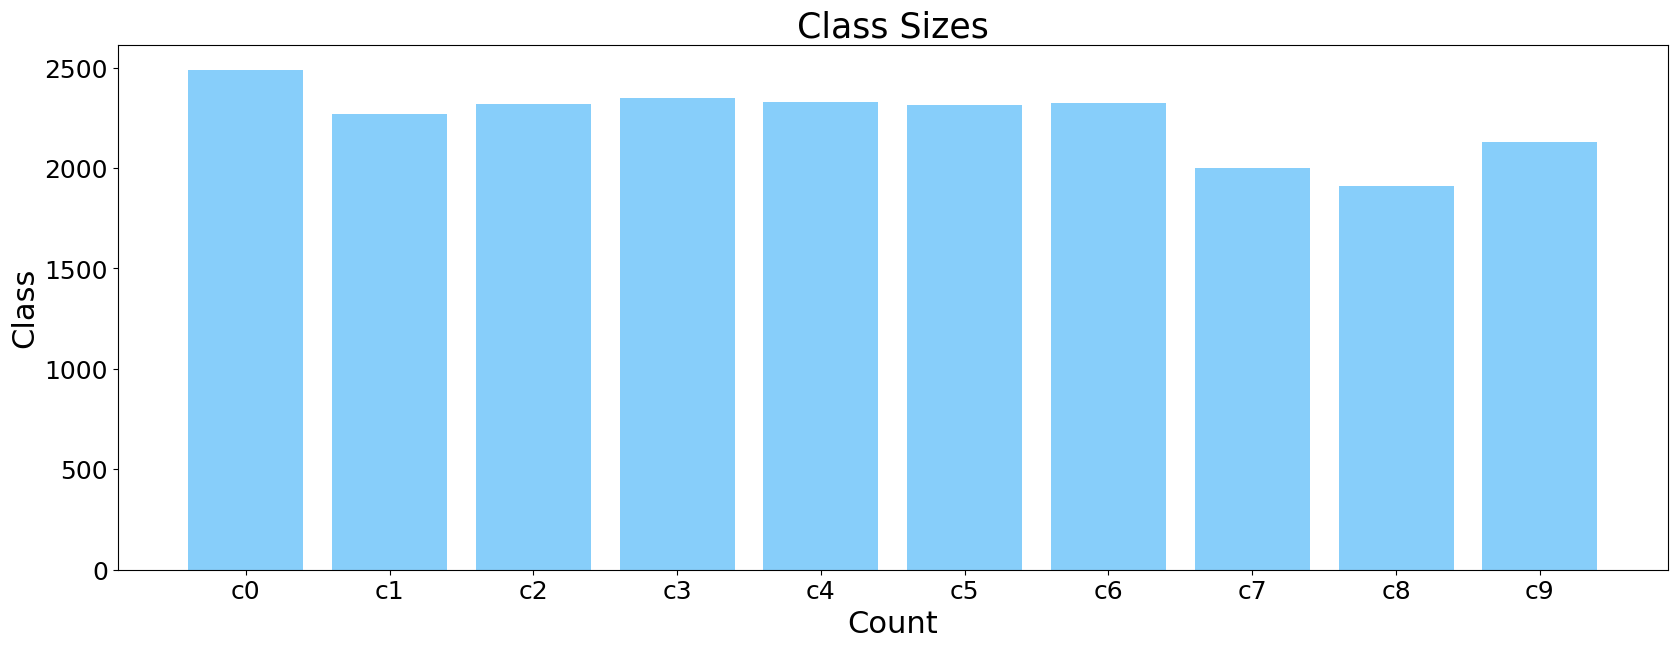

In [4]:
train_c0 = 'split_data/correct_train/c0'
train_c0_len = len([file for file in os.listdir(train_c0) if file.endswith('.jpg')])

train_c1 = 'split_data/correct_train/c1'
train_c1_len = len([file for file in os.listdir(train_c1) if file.endswith('.jpg')])

train_c2 = 'split_data/correct_train/c2'
train_c2_len = len([file for file in os.listdir(train_c2) if file.endswith('.jpg')])

train_c3 = 'split_data/correct_train/c3'
train_c3_len = len([file for file in os.listdir(train_c3) if file.endswith('.jpg')])

train_c4 = 'split_data/correct_train/c4'
train_c4_len = len([file for file in os.listdir(train_c4) if file.endswith('.jpg')])

train_c5 = 'split_data/correct_train/c5'
train_c5_len = len([file for file in os.listdir(train_c5) if file.endswith('.jpg')])

train_c6 = 'split_data/correct_train/c6'
train_c6_len = len([file for file in os.listdir(train_c6) if file.endswith('.jpg')])

train_c7 = 'split_data/correct_train/c7'
train_c7_len = len([file for file in os.listdir(train_c7) if file.endswith('.jpg')])

train_c8 = 'split_data/correct_train/c8'
train_c8_len = len([file for file in os.listdir(train_c8) if file.endswith('.jpg')])

train_c9 = 'split_data/correct_train/c9'
train_c9_len = len([file for file in os.listdir(train_c9) if file.endswith('.jpg')])

sizes = [train_c0_len, train_c1_len, train_c2_len, train_c3_len, train_c4_len, train_c5_len, train_c6_len,
        train_c7_len, train_c8_len, train_c9_len]

categories = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
              
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(211)

ax.bar(categories, sizes, color = "lightskyblue")
ax.tick_params(axis='both', which='major', labelsize=18)

plt.title('Class Sizes',size=25)
plt.ylabel('Class',size=22)
plt.xlabel('Count',size=22)

plt.show()


## Modeling

The dataset is quite large and the classes are relatively balanced, so no data augmentation is needed.

In [5]:
# All images will be rescaled by 1./255

train_dir = 'split_data/correct_train'
test_dir = 'split_data/correct_test'
# validation_dir = 'split_data/validation'


train_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.20)
test_datagen = ImageDataGenerator(rescale=1./255)
# validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    # All images will be resized to 160x120
    target_size=(160, 120),
    batch_size=7173,
    class_mode='categorical',
    subset = 'training')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    # All images will be resized to 160x120
    target_size=(160, 120),
    batch_size=897,
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    # All images will be resized to 160x120
    target_size=(160, 120),
    batch_size=1952,
    class_mode='categorical',
    subset = 'validation')

Found 17943 images belonging to 10 classes.
Found 338 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [6]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(validation_generator)

In [7]:
# count = 0
# for test_image in test_images:
#     if np.array(test_images) == np.array(train_images):
#         count +=1

In [8]:
train_images.shape

(7173, 160, 120, 3)

In [9]:
train_labels.shape

(7173, 10)

In [10]:
val_images.shape

(1952, 160, 120, 3)

In [11]:
val_labels.shape

(1952, 10)

### Baseline Model

In [407]:
baseline_model = Sequential()
baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(10,activation='softmax'))

In [408]:
baseline_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [409]:
baseline_history = baseline_model.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30
  1/718 [..............................] - ETA: 3:59 - loss: 2.5678 - acc: 0.1000

2022-12-25 02:05:49.200014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 1.3844 - acc: 0.5569

2022-12-25 02:06:00.466302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 14s 19ms/step - loss: 1.3844 - acc: 0.5569 - val_loss: 0.8130 - val_acc: 0.7249
Epoch 2/30
718/718 [==============================] - 13s 18ms/step - loss: 0.5366 - acc: 0.8606 - val_loss: 0.3854 - val_acc: 0.9257
Epoch 3/30
718/718 [==============================] - 12s 17ms/step - loss: 0.3132 - acc: 0.9311 - val_loss: 0.3097 - val_acc: 0.9252
Epoch 4/30
718/718 [==============================] - 12s 17ms/step - loss: 0.2133 - acc: 0.9566 - val_loss: 0.2399 - val_acc: 0.9370
Epoch 5/30
718/718 [==============================] - 12s 17ms/step - loss: 0.1505 - acc: 0.9696 - val_loss: 0.4340 - val_acc: 0.8632
Epoch 6/30
718/718 [==============================] - 12s 17ms/step - loss: 0.1493 - acc: 0.9642 - val_loss: 0.2506 - val_acc: 0.9283
Epoch 7/30
718/718 [==============================] - 12s 17ms/step - loss: 0.1022 - acc: 0.9794 - val_loss: 0.1328 - val_acc: 0.9688
Epoch 8/30
718/718 [==============================] - 12s 17ms/step - los

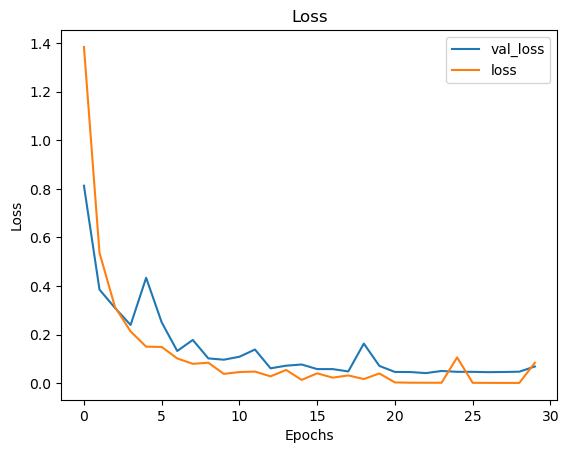

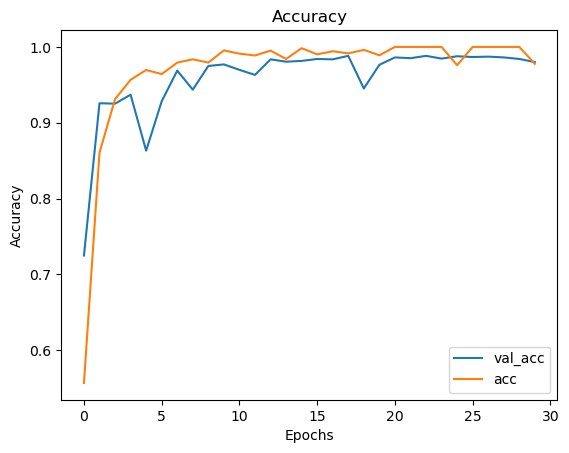

In [410]:
plt.figure() 
plt.plot(baseline_history.history['val_loss']) 
plt.plot(baseline_history.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(baseline_history.history['val_acc'])
plt.plot(baseline_history.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [411]:
baseline_results_train = baseline_model.evaluate(train_images, train_labels)
baseline_results_val = baseline_model.evaluate(val_images, val_labels)
baseline_results_test = baseline_model.evaluate(test_images, test_labels)

11/11 [==============================] - 0s 17ms/step - loss: 4.6625 - acc: 0.3964


11/11 [==============================] - 0s 4ms/step


2022-12-25 02:12:06.807139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


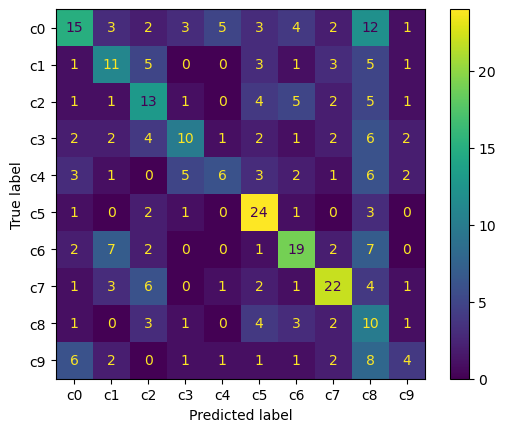

In [412]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(baseline_model, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 1

In [400]:
model1 = Sequential()

model1.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(160, 120, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))

model1.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(160, 120, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))

model1.add(layers.Dropout(0.3))
model1.add(layers.Flatten())
model1.add(layers.Dense(256,activation='relu'))
model1.add(layers.Dense(10,activation='softmax'))

In [401]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [402]:
model1.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_109 (Conv2D)         (None, 158, 118, 32)      896       
                                                                 
 batch_normalization_110 (Ba  (None, 158, 118, 32)     128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 79, 59, 32)       0         
 2D)                                                             
                                                                 
 conv2d_110 (Conv2D)         (None, 77, 57, 64)        18496     
                                                                 
 batch_normalization_111 (Ba  (None, 77, 57, 64)       256       
 tchNormalization)                                               
                                                     

In [403]:
history_1 = model1.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 01:48:25.301379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.8375 - acc: 0.7719

2022-12-25 01:48:58.507703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 37s 51ms/step - loss: 0.8375 - acc: 0.7719 - val_loss: 0.1646 - val_acc: 0.9580
Epoch 2/30
718/718 [==============================] - 35s 49ms/step - loss: 0.0875 - acc: 0.9762 - val_loss: 0.1063 - val_acc: 0.9698
Epoch 3/30
718/718 [==============================] - 35s 49ms/step - loss: 0.0565 - acc: 0.9856 - val_loss: 0.2312 - val_acc: 0.9252
Epoch 4/30
718/718 [==============================] - 35s 49ms/step - loss: 0.0690 - acc: 0.9795 - val_loss: 0.1149 - val_acc: 0.9621
Epoch 5/30
718/718 [==============================] - 35s 49ms/step - loss: 0.0578 - acc: 0.9813 - val_loss: 0.0703 - val_acc: 0.9826
Epoch 6/30
718/718 [==============================] - 34s 48ms/step - loss: 0.0357 - acc: 0.9897 - val_loss: 0.1001 - val_acc: 0.9708
Epoch 7/30
718/718 [==============================] - 35s 48ms/step - loss: 0.0386 - acc: 0.9898 - val_loss: 0.1475 - val_acc: 0.9657
Epoch 8/30
718/718 [==============================] - 37s 51ms/step - los

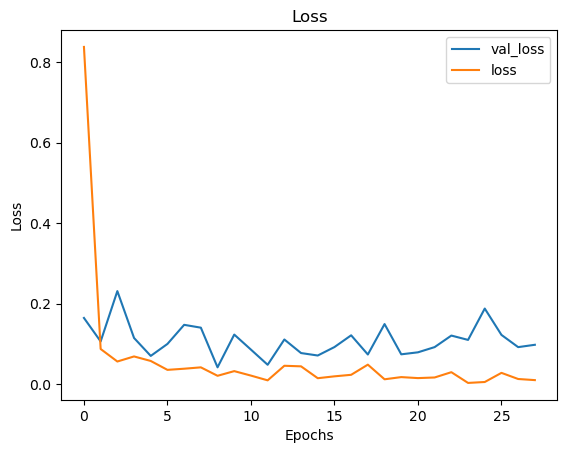

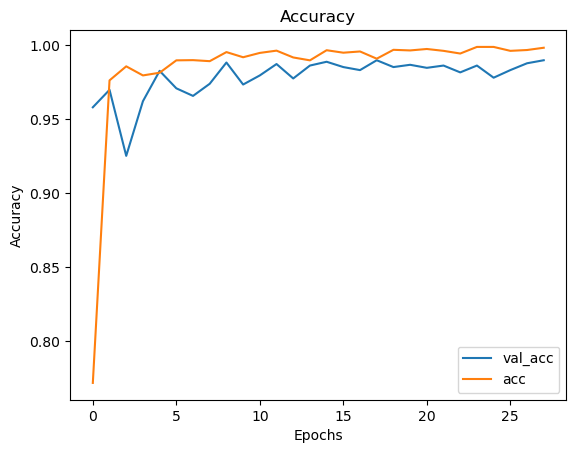

In [404]:
plt.figure() 
plt.plot(history_1.history['val_loss']) 
plt.plot(history_1.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_1.history['val_acc'])
plt.plot(history_1.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [405]:
model1_results_train = model1.evaluate(train_images, train_labels)
model1_results_val = model1.evaluate(val_images, val_labels)
model1_results_test = model1.evaluate(test_images, test_labels)

11/11 [==============================] - 1s 51ms/step - loss: 6.2598 - acc: 0.5030


 3/11 [=======>......................] - ETA: 0s

2022-12-25 02:05:47.268767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 42ms/step


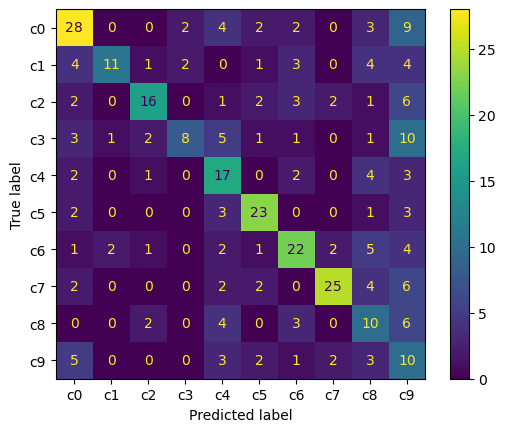

In [406]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model1, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 2

In [413]:
model2 = Sequential()

model2.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(160, 120, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.3))

model2.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(160, 120, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.3))

model2.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(160, 120, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.3))

model2.add(layers.Flatten())
model2.add(layers.Dense(512,activation='relu'))
model2.add(layers.Dense(10,activation='softmax'))

In [414]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [415]:
model2.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_111 (Conv2D)         (None, 158, 118, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 79, 59, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_112 (Ba  (None, 79, 59, 32)       128       
 tchNormalization)                                               
                                                                 
 dropout_4 (Dropout)         (None, 79, 59, 32)        0         
                                                                 
 conv2d_112 (Conv2D)         (None, 77, 57, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 38, 28, 64)     

In [416]:
history_2 = model2.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 02:12:16.573029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 1.0583 - acc: 0.6728

2022-12-25 02:12:48.255219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 36s 48ms/step - loss: 1.0583 - acc: 0.6728 - val_loss: 0.7251 - val_acc: 0.7469
Epoch 2/30
718/718 [==============================] - 33s 46ms/step - loss: 0.2155 - acc: 0.9321 - val_loss: 0.3377 - val_acc: 0.8919
Epoch 3/30
718/718 [==============================] - 33s 45ms/step - loss: 0.1351 - acc: 0.9596 - val_loss: 0.3212 - val_acc: 0.9063
Epoch 4/30
718/718 [==============================] - 33s 46ms/step - loss: 0.0924 - acc: 0.9731 - val_loss: 0.2452 - val_acc: 0.9226
Epoch 5/30
718/718 [==============================] - 35s 49ms/step - loss: 0.1008 - acc: 0.9724 - val_loss: 0.1405 - val_acc: 0.9513
Epoch 6/30
718/718 [==============================] - 36s 50ms/step - loss: 0.1113 - acc: 0.9723 - val_loss: 0.1334 - val_acc: 0.9652
Epoch 7/30
718/718 [==============================] - 41s 57ms/step - loss: 0.0589 - acc: 0.9830 - val_loss: 0.1228 - val_acc: 0.9667
Epoch 8/30
718/718 [==============================] - 35s 49ms/step - los

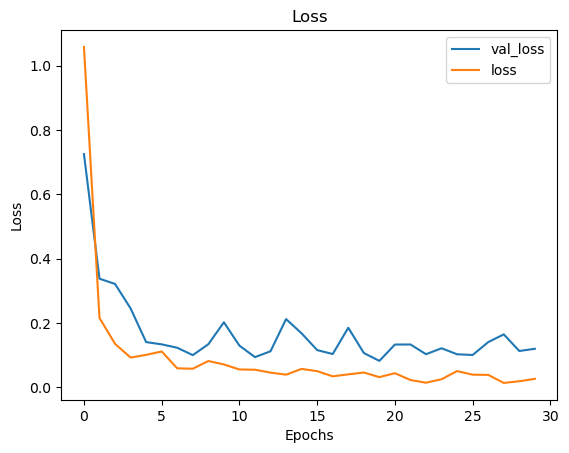

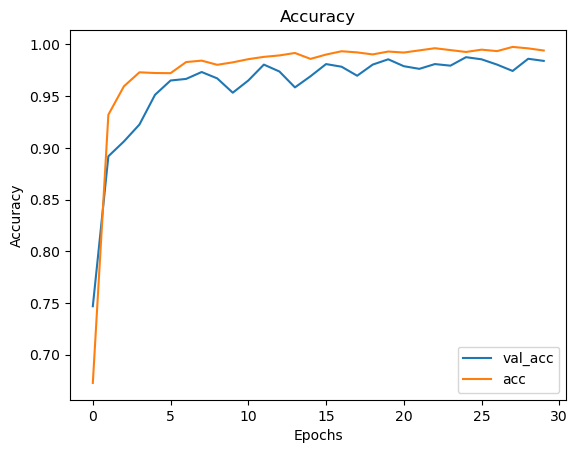

In [417]:
plt.figure() 
plt.plot(history_2.history['val_loss']) 
plt.plot(history_2.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_2.history['val_acc'])
plt.plot(history_2.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [418]:
model2_results_train = model2.evaluate(train_images, train_labels)
model2_results_val = model2.evaluate(val_images, val_labels)
model2_results_test = model2.evaluate(test_images, test_labels)

11/11 [==============================] - 1s 43ms/step - loss: 5.0671 - acc: 0.5444


 1/11 [=>............................] - ETA: 2s

2022-12-25 02:29:52.933179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 35ms/step


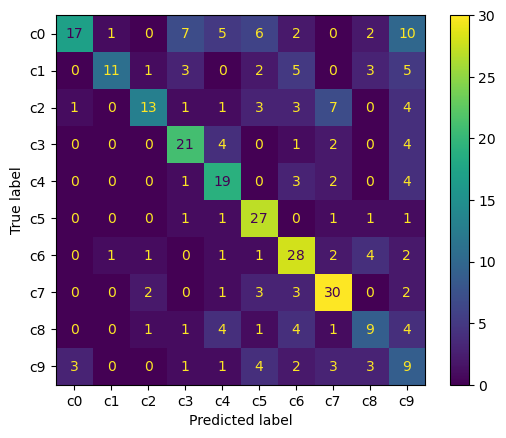

In [419]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model2, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Using Pre-trained Models

### Model 3 - ResNet 50

In [420]:
from tensorflow.keras.applications.resnet50 import ResNet50

resnet50 = ResNet50(weights='imagenet',include_top=False,input_shape = (160,120,3))


for layer in resnet50.layers[:-3]:
    layer.trainable=False

In [421]:
model3 = models.Sequential()
model3.add(resnet50)

model3.add(layers.Flatten())
model3.add(layers.Dense(512,activation = 'relu'))
model3.add(layers.Dense(10,activation = 'softmax'))

In [422]:
model3.compile(loss='categorical_crossentropy',
               optimizer = optimizers.Adam(lr=1e-4),
               metrics=['acc'])

In [423]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)

history_3 = model3.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 02:29:56.332077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 1.5660 - acc: 0.4719

2022-12-25 02:30:54.068173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 73s 98ms/step - loss: 1.5660 - acc: 0.4719 - val_loss: 1.2049 - val_acc: 0.5717
Epoch 2/30
718/718 [==============================] - 68s 94ms/step - loss: 0.8566 - acc: 0.7493 - val_loss: 0.6739 - val_acc: 0.8222
Epoch 3/30
718/718 [==============================] - 63s 88ms/step - loss: 0.5615 - acc: 0.8558 - val_loss: 0.5879 - val_acc: 0.8186
Epoch 4/30
718/718 [==============================] - 63s 87ms/step - loss: 0.4059 - acc: 0.8977 - val_loss: 0.4753 - val_acc: 0.8535
Epoch 5/30
718/718 [==============================] - 63s 88ms/step - loss: 0.3085 - acc: 0.9221 - val_loss: 0.3638 - val_acc: 0.8981
Epoch 6/30
718/718 [==============================] - 63s 88ms/step - loss: 0.2326 - acc: 0.9423 - val_loss: 0.3249 - val_acc: 0.9011
Epoch 7/30
718/718 [==============================] - 63s 87ms/step - loss: 0.1959 - acc: 0.9506 - val_loss: 0.2527 - val_acc: 0.9314
Epoch 8/30
718/718 [==============================] - 63s 88ms/step - los

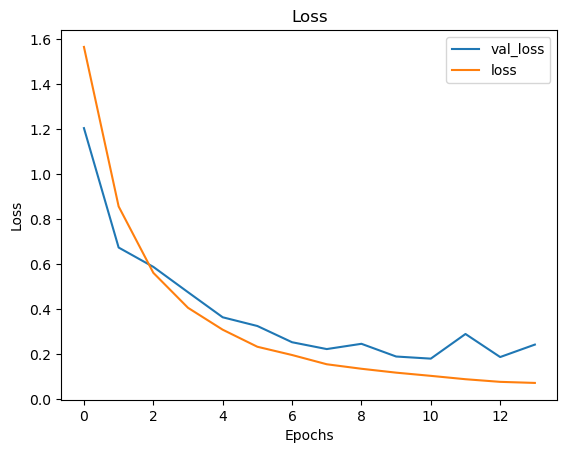

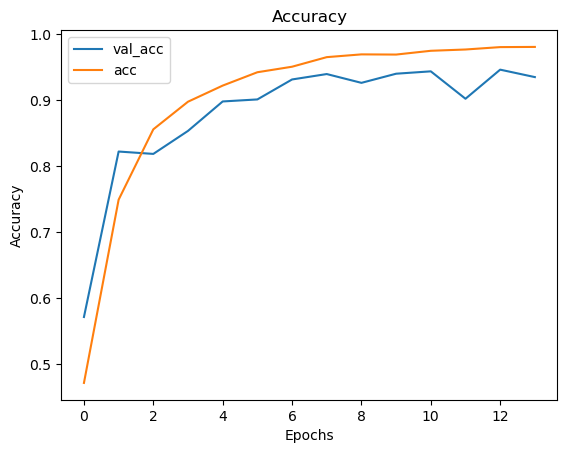

In [424]:
plt.figure() 
plt.plot(history_3.history['val_loss']) 
plt.plot(history_3.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_3.history['val_acc'])
plt.plot(history_3.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [425]:
model3_results_train = model3.evaluate(train_images, train_labels)
model3_results_val = model3.evaluate(val_images, val_labels)
model3_results_test = model3.evaluate(test_images, test_labels)

11/11 [==============================] - 3s 254ms/step - loss: 2.9385 - acc: 0.4497


2022-12-25 02:45:47.029952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 4s 216ms/step


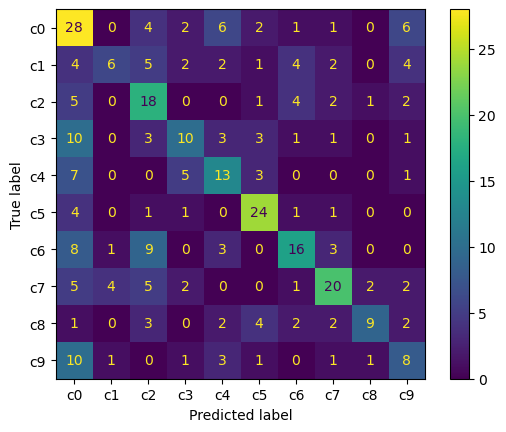

In [426]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model3, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 4 - InceptionV3

In [432]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

inception_v3 = InceptionV3(weights='imagenet', include_top=False, input_shape = (160,120,3))

for layer in inception_v3.layers[:-3]:
    layer.trainable=False

In [433]:
model4 = Sequential()
model4.add(inception_v3)

model4.add(layers.Flatten())
model4.add(layers.Dense(512,activation='relu'))
model4.add(layers.Dense(10,activation='softmax'))

In [434]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model4.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [435]:
model4.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 2, 2048)        21802784  
                                                                 
 flatten_62 (Flatten)        (None, 12288)             0         
                                                                 
 dense_131 (Dense)           (None, 512)               6291968   
                                                                 
 dense_132 (Dense)           (None, 10)                5130      
                                                                 
Total params: 28,099,882
Trainable params: 6,297,098
Non-trainable params: 21,802,784
_________________________________________________________________


In [436]:
history_4 = model4.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 02:48:13.881197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 1.0727 - acc: 0.6728

2022-12-25 02:48:45.221234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 51s 55ms/step - loss: 1.0727 - acc: 0.6728 - val_loss: 0.5031 - val_acc: 0.8325
Epoch 2/30
718/718 [==============================] - 31s 43ms/step - loss: 0.2832 - acc: 0.9122 - val_loss: 0.6410 - val_acc: 0.8304
Epoch 3/30
718/718 [==============================] - 40s 56ms/step - loss: 0.1506 - acc: 0.9523 - val_loss: 0.3553 - val_acc: 0.8955
Epoch 4/30
718/718 [==============================] - 36s 51ms/step - loss: 0.0784 - acc: 0.9764 - val_loss: 0.2839 - val_acc: 0.9155
Epoch 5/30
718/718 [==============================] - 34s 47ms/step - loss: 0.0919 - acc: 0.9716 - val_loss: 0.4500 - val_acc: 0.8770
Epoch 6/30
718/718 [==============================] - 33s 46ms/step - loss: 0.1165 - acc: 0.9635 - val_loss: 0.2725 - val_acc: 0.9283
Epoch 7/30
718/718 [==============================] - 33s 46ms/step - loss: 0.0473 - acc: 0.9865 - val_loss: 0.5137 - val_acc: 0.8689
Epoch 8/30
718/718 [==============================] - 33s 46ms/step - los

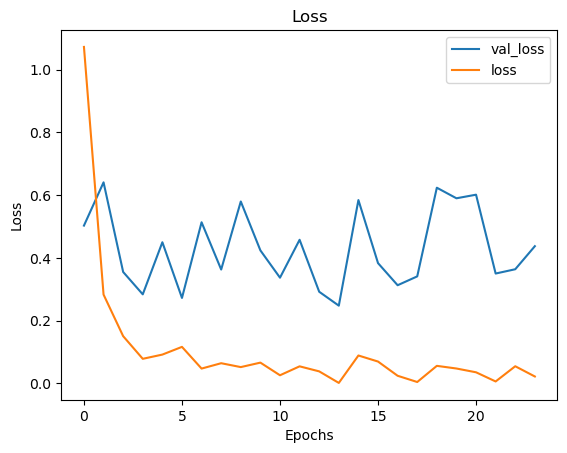

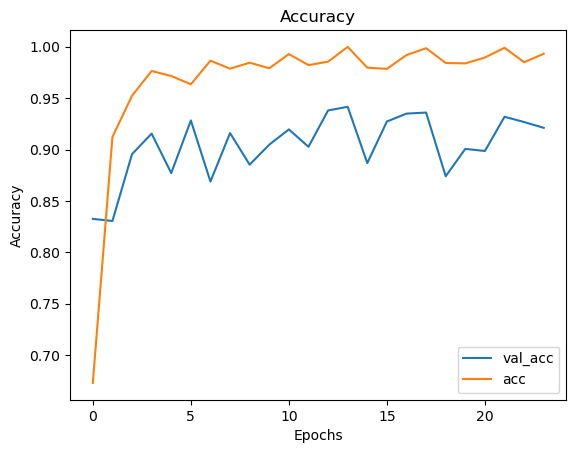

In [437]:
plt.figure() 
plt.plot(history_4.history['val_loss']) 
plt.plot(history_4.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_4.history['val_acc'])
plt.plot(history_4.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [438]:
model4_results_train = model4.evaluate(train_images, train_labels)
model4_results_val = model4.evaluate(val_images, val_labels)
model4_results_test = model4.evaluate(test_images, test_labels)

11/11 [==============================] - 2s 204ms/step - loss: 6.0058 - acc: 0.3521


2022-12-25 03:02:24.597506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 4s 217ms/step


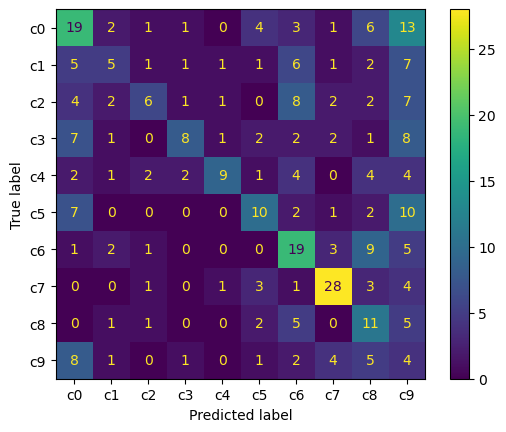

In [439]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model4, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 5 - VGG16

In [440]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

for layer in vgg16.layers[:-3]:
    layer.trainable=False

In [441]:
model5 = Sequential()
model5.add(vgg16)

model5.add(layers.Flatten())
model5.add(layers.Dense(512,activation='relu'))
model5.add(layers.Dense(10,activation='softmax'))

In [442]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model5.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [443]:
model5.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_63 (Flatten)        (None, 7680)              0         
                                                                 
 dense_133 (Dense)           (None, 512)               3932672   
                                                                 
 dense_134 (Dense)           (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 8,657,418
Non-trainable params: 9,995,072
_________________________________________________________________


In [444]:
history_5 = model5.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 03:02:30.036567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.4343 - acc: 0.8579

2022-12-25 03:03:36.550384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 83s 114ms/step - loss: 0.4343 - acc: 0.8579 - val_loss: 0.1719 - val_acc: 0.9549
Epoch 2/30
718/718 [==============================] - 83s 115ms/step - loss: 0.0660 - acc: 0.9826 - val_loss: 0.0884 - val_acc: 0.9775
Epoch 3/30
718/718 [==============================] - 81s 113ms/step - loss: 0.0355 - acc: 0.9895 - val_loss: 0.0496 - val_acc: 0.9882
Epoch 4/30
718/718 [==============================] - 81s 113ms/step - loss: 0.0227 - acc: 0.9948 - val_loss: 0.0602 - val_acc: 0.9867
Epoch 5/30
718/718 [==============================] - 81s 113ms/step - loss: 0.0435 - acc: 0.9888 - val_loss: 0.1004 - val_acc: 0.9764
Epoch 6/30
718/718 [==============================] - 82s 115ms/step - loss: 0.0237 - acc: 0.9921 - val_loss: 0.1122 - val_acc: 0.9749
Epoch 7/30
718/718 [==============================] - 84s 117ms/step - loss: 0.0301 - acc: 0.9925 - val_loss: 0.0577 - val_acc: 0.9898
Epoch 8/30
718/718 [==============================] - 89s 123ms/st

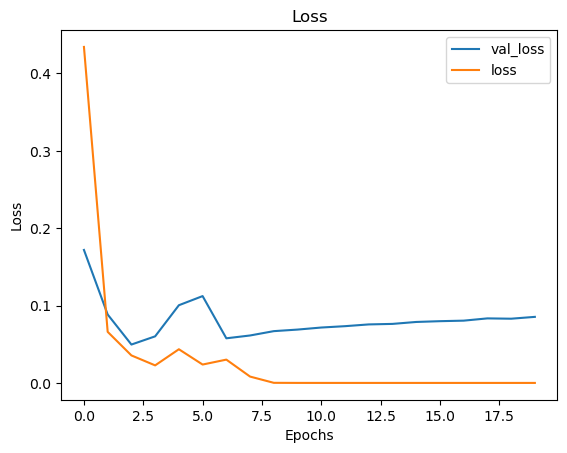

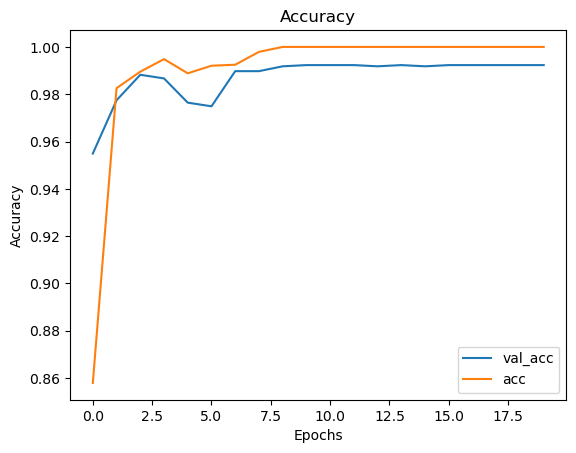

In [445]:
plt.figure() 
plt.plot(history_5.history['val_loss']) 
plt.plot(history_5.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_5.history['val_acc'])
plt.plot(history_5.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [446]:
model5_results_train = model5.evaluate(train_images, train_labels)
model5_results_val = model5.evaluate(val_images, val_labels)
model5_results_test = model5.evaluate(test_images, test_labels)

11/11 [==============================] - 2s 177ms/step - loss: 1.9442 - acc: 0.7633


2022-12-25 03:49:23.423331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 162ms/step


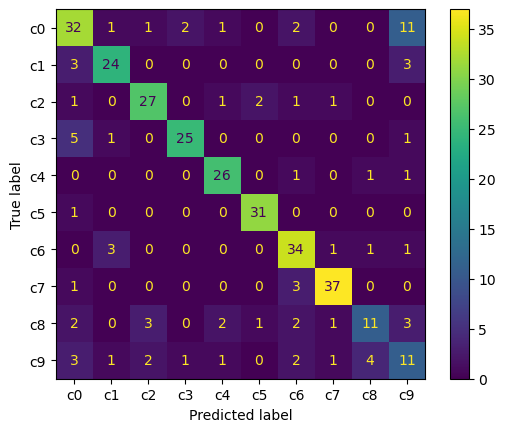

In [447]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model5, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 6 - VGG16 With Tuning

In [448]:
vgg16_b = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

for layer in vgg16_b.layers[:-4]:
    layer.trainable=False

In [449]:
model6 = Sequential()
model6.add(vgg16_b)

model6.add(layers.Flatten())
model6.add(layers.Dense(512,activation='relu'))
model6.add(layers.Dense(10,activation='softmax'))

In [450]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model6.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [451]:
model6.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_64 (Flatten)        (None, 7680)              0         
                                                                 
 dense_135 (Dense)           (None, 512)               3932672   
                                                                 
 dense_136 (Dense)           (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 11,017,226
Non-trainable params: 7,635,264
_________________________________________________________________


In [452]:
history_6 = model6.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 03:49:29.518530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.4314 - acc: 0.8599

2022-12-25 03:55:21.273952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 363s 505ms/step - loss: 0.4314 - acc: 0.8599 - val_loss: 0.0956 - val_acc: 0.9734
Epoch 2/30
718/718 [==============================] - 74s 103ms/step - loss: 0.0646 - acc: 0.9822 - val_loss: 0.1177 - val_acc: 0.9682
Epoch 3/30
718/718 [==============================] - 79s 110ms/step - loss: 0.0510 - acc: 0.9848 - val_loss: 0.0989 - val_acc: 0.9744
Epoch 4/30
718/718 [==============================] - 82s 114ms/step - loss: 0.0362 - acc: 0.9870 - val_loss: 0.1218 - val_acc: 0.9708
Epoch 5/30
718/718 [==============================] - 83s 115ms/step - loss: 0.0340 - acc: 0.9901 - val_loss: 0.0921 - val_acc: 0.9836
Epoch 6/30
718/718 [==============================] - 84s 117ms/step - loss: 0.0272 - acc: 0.9955 - val_loss: 0.0778 - val_acc: 0.9785
Epoch 7/30
718/718 [==============================] - 84s 118ms/step - loss: 0.0210 - acc: 0.9940 - val_loss: 0.0942 - val_acc: 0.9805
Epoch 8/30
718/718 [==============================] - 85s 119ms/s

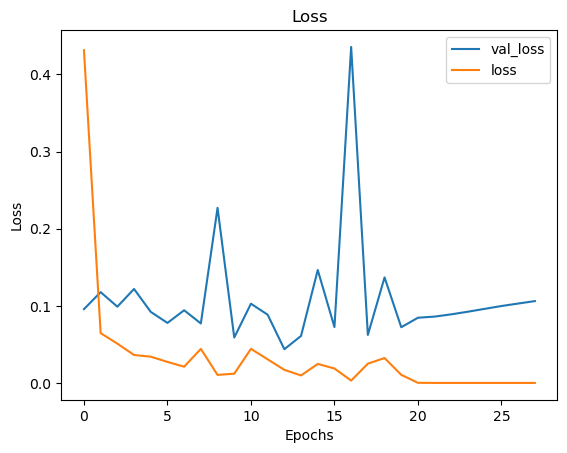

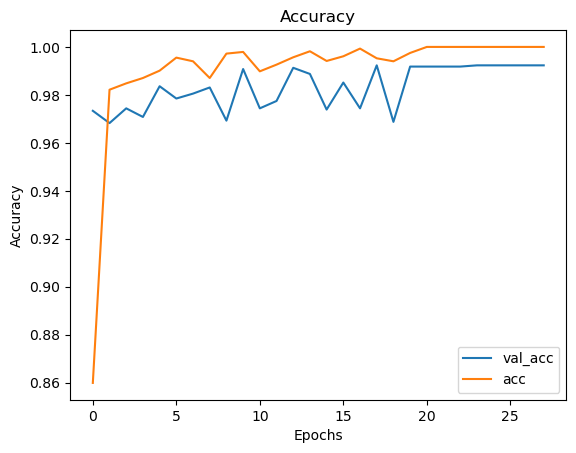

In [453]:
plt.figure() 
plt.plot(history_6.history['val_loss']) 
plt.plot(history_6.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_6.history['val_acc'])
plt.plot(history_6.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [454]:
model6_results_train = model6.evaluate(train_images, train_labels)
model6_results_val = model6.evaluate(val_images, val_labels)
model6_results_test = model6.evaluate(test_images, test_labels)

11/11 [==============================] - 3s 231ms/step - loss: 1.9032 - acc: 0.8254


2022-12-25 04:39:38.793418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 3s 228ms/step


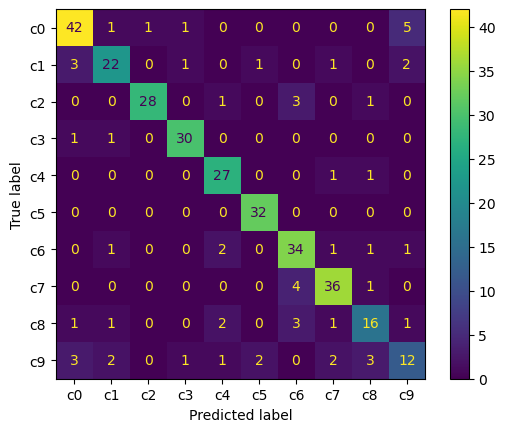

In [455]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model6, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 7

In [488]:
vgg16_c = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

for layer in vgg16_c.layers[:-5]:
    layer.trainable=False

In [489]:
model7 = Sequential()
model7.add(vgg16_c)

model7.add(layers.Flatten())
model7.add(layers.Dense(512,activation='relu'))
model7.add(layers.Dense(10,activation='softmax'))

In [490]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model7.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [491]:
model7.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_69 (Flatten)        (None, 7680)              0         
                                                                 
 dense_145 (Dense)           (None, 512)               3932672   
                                                                 
 dense_146 (Dense)           (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 11,017,226
Non-trainable params: 7,635,264
_________________________________________________________________


In [492]:
history_7 = model7.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 15:00:40.622162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.4852 - acc: 0.8387

2022-12-25 15:01:34.835284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 66s 90ms/step - loss: 0.4852 - acc: 0.8387 - val_loss: 0.1424 - val_acc: 0.9575
Epoch 2/30
718/718 [==============================] - 61s 86ms/step - loss: 0.0837 - acc: 0.9735 - val_loss: 0.0612 - val_acc: 0.9857
Epoch 3/30
718/718 [==============================] - 61s 86ms/step - loss: 0.0430 - acc: 0.9879 - val_loss: 0.1026 - val_acc: 0.9744
Epoch 4/30
718/718 [==============================] - 64s 89ms/step - loss: 0.0399 - acc: 0.9891 - val_loss: 0.0530 - val_acc: 0.9892
Epoch 5/30
718/718 [==============================] - 81s 113ms/step - loss: 0.0248 - acc: 0.9940 - val_loss: 0.0640 - val_acc: 0.9903
Epoch 6/30
718/718 [==============================] - 78s 109ms/step - loss: 0.0361 - acc: 0.9897 - val_loss: 0.1463 - val_acc: 0.9647
Epoch 7/30
718/718 [==============================] - 71s 99ms/step - loss: 0.0490 - acc: 0.9856 - val_loss: 0.0905 - val_acc: 0.9780
Epoch 8/30
718/718 [==============================] - 78s 109ms/step - 

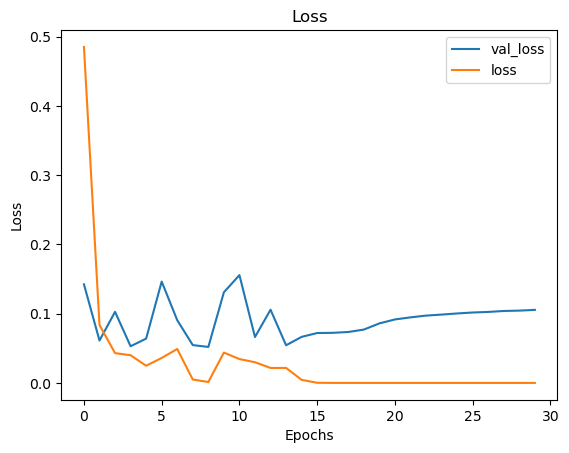

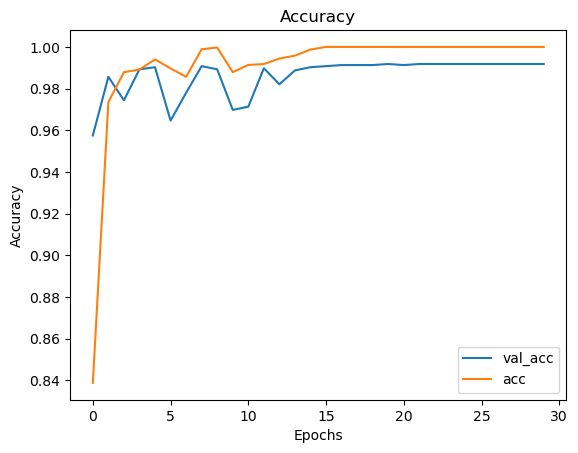

In [493]:
plt.figure() 
plt.plot(history_7.history['val_loss']) 
plt.plot(history_7.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_7.history['val_acc'])
plt.plot(history_7.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [494]:
model7_results_train = model7.evaluate(train_images, train_labels)
model7_results_val = model7.evaluate(val_images, val_labels)
model7_results_test = model7.evaluate(test_images, test_labels)

11/11 [==============================] - 3s 274ms/step - loss: 1.9130 - acc: 0.8166


2022-12-25 15:48:00.532531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 3s 258ms/step


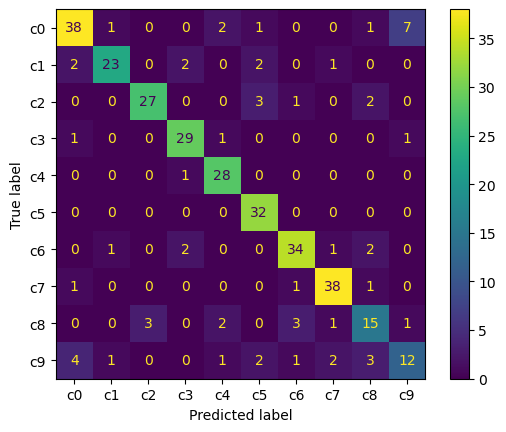

In [495]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model7, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

### Model 8

In [478]:
vgg16_d = VGG16(weights='imagenet', include_top=False, input_shape = (160,120,3))

for layer in vgg16_d.layers[:-6]:
    layer.trainable=False

In [479]:
model8 = Sequential()
model8.add(vgg16_d)

model8.add(layers.Flatten())
model8.add(layers.Dense(512,activation='relu'))
model8.add(layers.Dense(10,activation='softmax'))

In [480]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', min_delta = 1e-8, 
                  patience = 10)

model8.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [481]:
model8.summary()

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 3, 512)         14714688  
                                                                 
 flatten_68 (Flatten)        (None, 7680)              0         
                                                                 
 dense_143 (Dense)           (None, 512)               3932672   
                                                                 
 dense_144 (Dense)           (None, 10)                5130      
                                                                 
Total params: 18,652,490
Trainable params: 13,377,034
Non-trainable params: 5,275,456
_________________________________________________________________


In [482]:
history_8 = model8.fit(train_images,
                    train_labels,
                    epochs=30,
                    callbacks = [es],
                    batch_size = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/30


2022-12-25 12:43:50.668918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - ETA: 0s - loss: 0.5827 - acc: 0.8011

2022-12-25 12:48:41.083197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


718/718 [==============================] - 303s 421ms/step - loss: 0.5827 - acc: 0.8011 - val_loss: 0.1415 - val_acc: 0.9621
Epoch 2/30
718/718 [==============================] - 901s 1s/step - loss: 0.0894 - acc: 0.9730 - val_loss: 0.1031 - val_acc: 0.9708
Epoch 3/30
718/718 [==============================] - 442s 616ms/step - loss: 0.0474 - acc: 0.9856 - val_loss: 0.0731 - val_acc: 0.9826
Epoch 4/30
718/718 [==============================] - 92s 129ms/step - loss: 0.0371 - acc: 0.9890 - val_loss: 0.1065 - val_acc: 0.9764
Epoch 5/30
718/718 [==============================] - 96s 133ms/step - loss: 0.0417 - acc: 0.9872 - val_loss: 0.0923 - val_acc: 0.9857
Epoch 6/30
718/718 [==============================] - 98s 137ms/step - loss: 0.0404 - acc: 0.9877 - val_loss: 0.0752 - val_acc: 0.9831
Epoch 7/30
718/718 [==============================] - 103s 144ms/step - loss: 0.0168 - acc: 0.9948 - val_loss: 0.0660 - val_acc: 0.9918
Epoch 8/30
718/718 [==============================] - 122s 170ms/

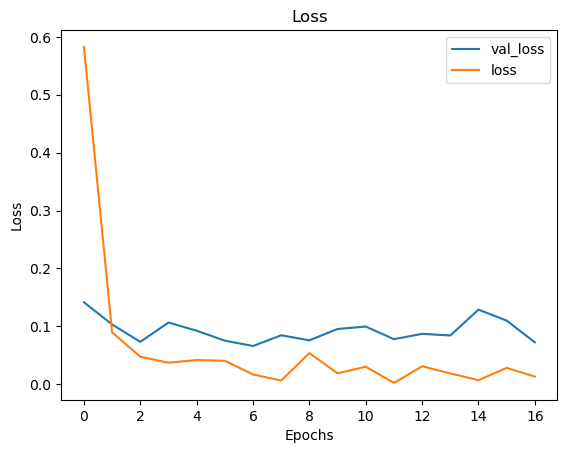

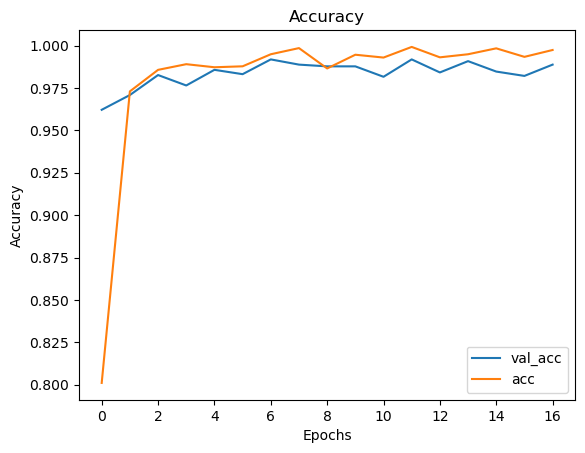

In [483]:
plt.figure() 
plt.plot(history_8.history['val_loss']) 
plt.plot(history_8.history['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_8.history['val_acc'])
plt.plot(history_8.history['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [484]:
model8_results_train = model8.evaluate(train_images, train_labels)
model8_results_val = model8.evaluate(val_images, val_labels)
model8_results_test = model8.evaluate(test_images, test_labels)

11/11 [==============================] - 4s 364ms/step - loss: 1.4928 - acc: 0.8018


2022-12-25 13:40:59.971464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 4s 271ms/step


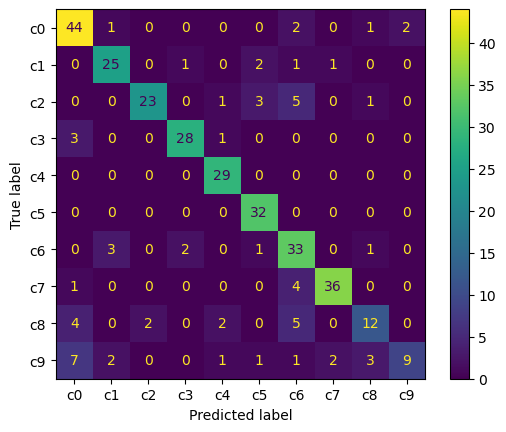

In [485]:
class_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred
classifier = estimator(model8, class_names)
plot_confusion_matrix(estimator=classifier, 
                      X=test_images, 
                      y_true=np.argmax(test_labels, axis = -1),
                      display_labels=class_names);

## Evaluation

### Examples

In [55]:
with open('models/model1.pkl' , 'rb') as f:
    lr = pickle.load(f)

In [56]:
def load(filename):
    image = Image.open(filename)
    image = np.array(image).astype('float32')/255
    image = transform.resize(image, (160, 120, 3))
    image = np.expand_dims(image, axis=0)
    return image

In [66]:
image_1 = load('unlabelled_test_data/img_1.jpg')
prediction = lr.predict(image_1)

1/1 [==============================] - 0s 9ms/step


In [67]:
prediction_list = prediction[0].tolist()

In [68]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print(index)

5


In [69]:
image_2 = load('unlabelled_test_data/img_2.jpg')
prediction = lr.predict(image_2)

1/1 [==============================] - 0s 10ms/step


In [70]:
prediction_list = prediction[0].tolist()

In [71]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print(index)

8


In [72]:
image_3 = load('unlabelled_test_data/img_3.jpg')
prediction = lr.predict(image_3)

1/1 [==============================] - 0s 9ms/step


In [73]:
prediction_list = prediction[0].tolist()

In [74]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print(index)

# WRONG

8


In [78]:
image_8 = load('unlabelled_test_data/img_8.jpg')
prediction = lr.predict(image_8)

1/1 [==============================] - 0s 9ms/step


In [79]:
prediction_list = prediction[0].tolist()

In [80]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print(index) 

# RIGHT

3


In [81]:
image_88 = load('unlabelled_test_data/img_88.jpg')
prediction = lr.predict(image_88)

1/1 [==============================] - 0s 10ms/step


In [82]:
prediction_list = prediction[0].tolist()

In [83]:
max_value = max(prediction_list)
index = prediction_list.index(max_value)
print(index)

6


In [ ]:
# Hair and makeup and talking on the phone with left hand are most easily confused

## Preparing for Deployment of Model

### Saving Model 6

In [239]:
# serialize model to JSON
model6_json = model6.to_json()
with open("models/model6.json", "w") as json_file:
    json_file.write(model6_json)
# serialize weights to HDF5
model6.save_weights("models/model6.h5")

In [240]:
with open("models/model6.pkl", "wb") as f:
    pickle.dump(model6, f)

INFO:tensorflow:Assets written to: ram://5885ca0b-e9a9-4610-ab4f-493d70f4f5e0/assets


INFO:tensorflow:Assets written to: ram://5885ca0b-e9a9-4610-ab4f-493d70f4f5e0/assets


### Saving Model 7

In [ ]:
# serialize model to JSON
model7_json = model7.to_json()
with open("models/model7.json", "w") as json_file:
    json_file.write(model7_json)
# serialize weights to HDF5
model7.save_weights("models/model7.h5")

In [ ]:
with open("models/model7.pkl", "wb") as f:
    pickle.dump(model7, f)

### Saving Model 8

In [486]:
# serialize model to JSON
model8_json = model8.to_json()
with open("models/model8.json", "w") as json_file:
    json_file.write(model8_json)
# serialize weights to HDF5
model8.save_weights("models/model8.h5")

In [487]:
with open("models/model8.pkl", "wb") as f:
    pickle.dump(model8, f)

INFO:tensorflow:Assets written to: ram://0af97873-7491-47ac-979e-e10c11b65e9c/assets


INFO:tensorflow:Assets written to: ram://0af97873-7491-47ac-979e-e10c11b65e9c/assets


## Deployed Model

## Conclusions

### Limitations

* The test images had to be manually labeled, and as a result, the size of the test data is small
* The images are from a single angle, so in practice, the State Farm DashCam would need to be positioned the same way

### Next Steps

* Obtain a greater amount of labeled test data
* Build the model based on images from various angles
* Analyze a potential relationship between the use of a DashCam and improvements in driving behaviors